In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import font_manager, rc
%matplotlib inline
import random

import pandas as pd

plt.rcParams['axes.unicode_minus'] = False

rc('font', family='AppleGothic')

In [2]:
iris = datasets.load_iris()

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()

pcafied = {}
d = iris_data.shape[1]

for i in range(1, d):
    pca = PCA(n_components=i)
    pipeline = make_pipeline(scaler, pca)
    pcafied['{}d'.format(i)] = pipeline.fit_transform(iris_data)
    
    print('{} dimension\'s variance ratio: {}'.format(i, sum(pca.explained_variance_ratio_)))

pcafied = pcafied['2d']

iris_pca = pd.DataFrame(pcafied, columns=['pca{}'.format(i) for i in range(1, pcafied.shape[1] + 1)])

iris_data['target'] = iris.target
iris_pca['target'] = iris.target

1 dimension's variance ratio: 0.7296244541329985
2 dimension's variance ratio: 0.9581320720000164
3 dimension's variance ratio: 0.9948212908928452


In [3]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_pca.head()

,pca1,pca2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


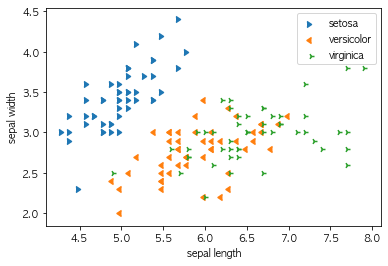

In [5]:
markers = list(Line2D.markers.keys())[:-4]

targets = list(iris_data.target.unique())

selected_m = random.sample(markers, len(targets))

for (i, t), m in zip(enumerate(targets), selected_m):
    cl = iris_data[iris_data.target.eq(t)]
    plt.scatter(cl['sepal length (cm)'], cl['sepal width (cm)'], marker=m, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

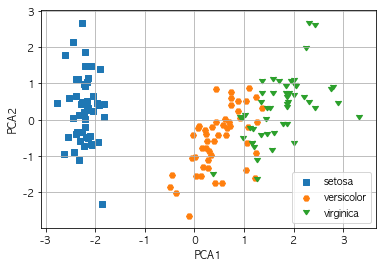

In [6]:
targets = list(iris_pca.target.unique())

selected_m = random.sample(markers, len(targets))

for (i, t), m in zip(enumerate(targets), selected_m):
    cl = iris_pca[iris_pca.target.eq(t)]
    plt.scatter(cl[cl.columns[0]], cl[cl.columns[1]], marker=m, label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.grid()
plt.show()